# Fake And Real News Detection With Random Forest 

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pickle
from dotenv import load_dotenv
import os
import mlflow


In [ ]:
load_dotenv("../../.env")

mlflow.set_tracking_uri(os.environ.get("MLFLOW_SERVER"))
mlflow.sklearn.autolog(log_input_examples=True, extra_tags={"Model": "Random Forest"})

In [2]:
# importing data

x_train_path = '../data/x_train.pkl'
x_test_path = '../data/x_test.pkl'
y_train_path = '../data/y_train.pkl'
y_test_path = '../data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    x_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    x_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)



In [3]:
vect = TfidfVectorizer(stop_words='english', max_df=0.7)
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)


In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(xv_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Predicting the model
y_pred = model.predict(xv_test)
# log these values too with mlflow
mlflow.log_metric("testing_accuracy", model.score(xv_test, y_test))
mlflow.log_metric("testing_f1", f1_score(y_test, y_pred, average='weighted'))
mlflow.log_metric("testing_recall", recall_score(y_test, y_pred, average='weighted'))
mlflow.log_metric("testing_precision", precision_score(y_test, y_pred, average='weighted'))

print("Accuracy of the model: ", model.score(xv_test, y_test))
print("F1 Score of the model: ", f1_score(y_test, y_pred, average='weighted'))
print("Recall of the model: ", recall_score(y_test, y_pred, average='weighted'))
print("Precision of the model: ", precision_score(y_test, y_pred, average='weighted'))


0.9986486486486487

Accuracy: 0.9986486486486487
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1437
           1       1.00      1.00      1.00      1523

    accuracy                           1.00      2960
   macro avg       1.00      1.00      1.00      2960
weighted avg       1.00      1.00      1.00      2960



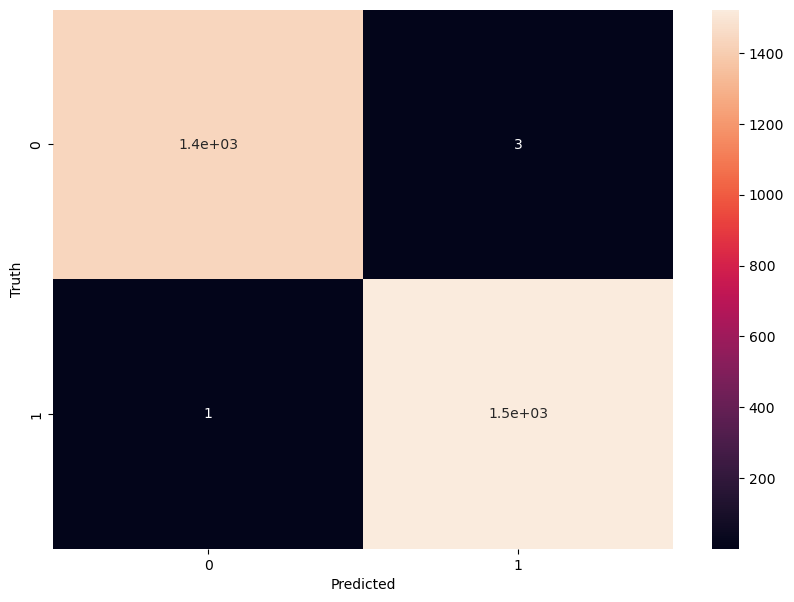

In [ ]:
# make a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# show to accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9986486486486487
Precision: 0.9980327868852459
Recall: 0.9993434011818779

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1437
           1       1.00      1.00      1.00      1523

    accuracy                           1.00      2960
   macro avg       1.00      1.00      1.00      2960
weighted avg       1.00      1.00      1.00      2960


Confusion Matrix:
 [[1434    3]
 [   1 1522]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9986486486486487
Precision: 0.9980327868852459
Recall: 0.9993434011818779


In [ ]:
fake = "A team of scientists conducting research in the Amazon rainforest have made an astonishing discovery: a new species of giant spider with a leg span of over one foot. The spider, named Arachnus giganteus, is believed to be the largest spider species ever discovered. According to the researchers, the discovery sheds light on the rich biodiversity of the Amazon and underscores the importance of conservation efforts in the region."

model.predict(vect.transform([fake]))[0]    

0